# Predicting Car Accident Severity Using Machine Learning Techniques

### CREATED BY: Hind Baageel 

### Step1: Importing Important Libraries

In [100]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import (RandomUnderSampler, 
                                     ClusterCentroids,
                                     TomekLinks,
                                     NeighbourhoodCleaningRule,
                                     NearMiss)
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

### Step2: Importing the |dataset

In [101]:
df=pd.read_csv("Data-Collisions.csv")

df.head()

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [102]:
df1.dtypes

X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE             int8
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER              int8
ROADCOND             int8
LIGHTCOND            int8
PEDROWNOTGRNT     float64
SDOTCOLNUM        float64
SPEEDING            int64
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR        int64
SEVERITYCODE        int64
dtype: objec

In [103]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194007.000000,188719.000000,188719.000000,194007.000000,194007.000000,194007.000000,64900.000000,194007.000000,194007.000000,194007.000000,194007.000000,194007.000000,194007.000000,1.143960e+05,194007.000000,1.940070e+05
mean,1.299865,-122.330518,47.619545,108640.304778,141273.862861,141481.481766,37560.973960,1.299865,2.444649,0.037241,0.028463,1.920539,13.869201,7.981212e+06,269.933889,9.816034e+03
std,0.458200,0.029975,0.056160,62607.022410,86599.201441,86951.380156,51764.839238,0.458200,1.346964,0.198418,0.167619,0.631488,6.873182,2.555448e+06,3319.738267,7.239092e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54573.500000,70675.500000,70675.500000,28666.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.041052e+06,0.000000,0.000000e+00
50%,1.000000,-122.330219,47.615369,107164.000000,123611.000000,123611.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.030010e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663667,162400.500000,203465.500000,203605.500000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015902e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


### Step3: Balancing the Samples

In [104]:
undersample = RandomUnderSampler(sampling_strategy='majority')

X = df.drop(columns=['SEVERITYCODE'], axis=1)
Y = df['SEVERITYCODE']

X_under,Y_under = undersample.fit_resample(X,Y)

df1= X_under 

df1['SEVERITYCODE'] = Y_under 

### Step4: Filling Missing Values

In [105]:
df1['SPEEDING'].fillna(0, inplace=True)
df1['SPEEDING'].replace('Y', 1, inplace=True)

df1['SPEEDING'].value_counts()

0    110397
1      5955
Name: SPEEDING, dtype: int64

In [106]:
df1['PEDROWNOTGRNT'].replace('Y', 1, inplace=True)
df1['PEDROWNOTGRNT'].fillna(0, inplace=True)

df1['PEDROWNOTGRNT'].value_counts()

0.0    111956
1.0      4396
Name: PEDROWNOTGRNT, dtype: int64

In [107]:
df1['UNDERINFL'].replace('N', 0, inplace=True)
df1['UNDERINFL'].fillna(0, inplace=True)

In [108]:
df1['HITPARKEDCAR'].replace('N', 0, inplace=True)
df1['HITPARKEDCAR'].replace('Y', 1, inplace=True)

### Step5: Converting Categorical data into Numerical

In [109]:
df1['WEATHER']= X['WEATHER'].astype('category').cat.codes

df1['WEATHER'].replace('-1', 11, inplace=True)

In [110]:
df1['ADDRTYPE']= df1['ADDRTYPE'].astype('category').cat.codes

df1['ADDRTYPE'].replace('-1', 3, inplace=True)

In [111]:
df1['LIGHTCOND']= df1['ADDRTYPE'].astype('category').cat.codes

df1['LIGHTCOND'].replace('-1', 3, inplace=True)

In [112]:
df1['ROADCOND']= df1['ROADCOND'].astype('category').cat.codes

df1['ROADCOND'].replace('-1', 9, inplace=True)

### Step6: Visulization and analysis

In [113]:
df1['WEATHER'].value_counts()

 1     66336
 6     20699
 4     17500
 10     9884
 9       623
 3       582
-1       302
 2       293
 8        92
 0        30
 7        11
Name: WEATHER, dtype: int64

In [114]:
df['WEATHER'].value_counts()

Clear                       110774
Raining                      33016
Overcast                     27616
Unknown                      15032
Snowing                        901
Other                          830
Fog/Smog/Smoke                 565
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

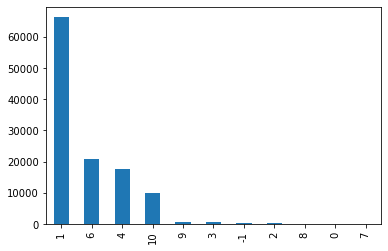

In [115]:
pd.value_counts(df1.WEATHER).plot.bar()

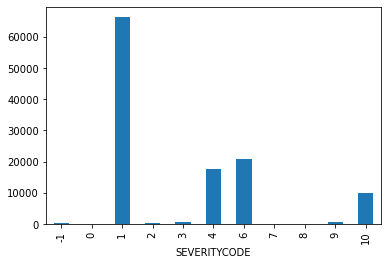

In [116]:
df1.groupby('WEATHER')['SEVERITYCODE'].count().plot(kind='bar')
plt.xlabel('SEVERITYCODE')
plt.show()

Text(0, 0.5, 'Collsion Count')

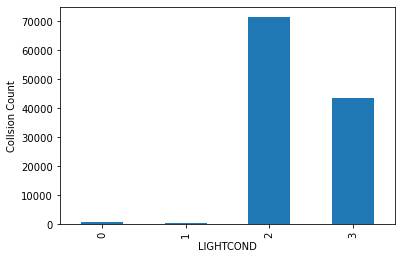

In [117]:
df1.groupby('LIGHTCOND')['LIGHTCOND'].count().plot(kind='bar')
plt.ylabel('Collsion Count')

In [118]:
df['LIGHTCOND'].value_counts()

Daylight                    115747
Dark - Street Lights On      48330
Unknown                      13433
Dusk                          5873
Dawn                          2488
Dark - No Street Lights       1531
Dark - Street Lights Off      1197
Other                          234
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

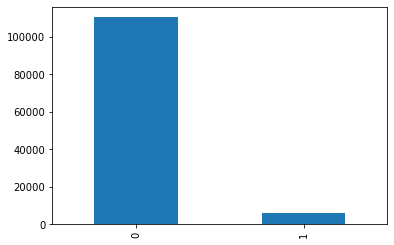

In [119]:
pd.value_counts(df1.SPEEDING).plot.bar()

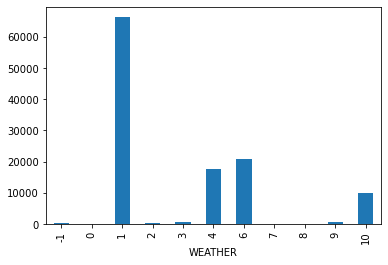

In [122]:
df1.groupby('WEATHER')['WEATHER'].count().plot(kind='bar')
#plt.ylabel('UNDERINFL')

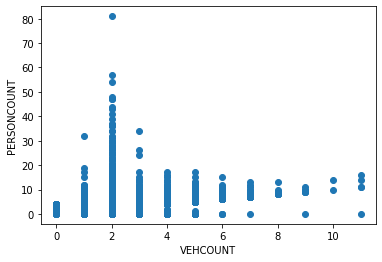

In [130]:
ax = plt.scatter(df1['VEHCOUNT'], df1['PERSONCOUNT'])
plt.xlabel('VEHCOUNT')
plt.ylabel('PERSONCOUNT')
plt.show()

#### In this plot, we can see that 2005 was the highest year in term of number of accidents. The total number of accident after 2005 started to fall until it raises back up on 2014 & 2015. The reason for this raise needs to be explored

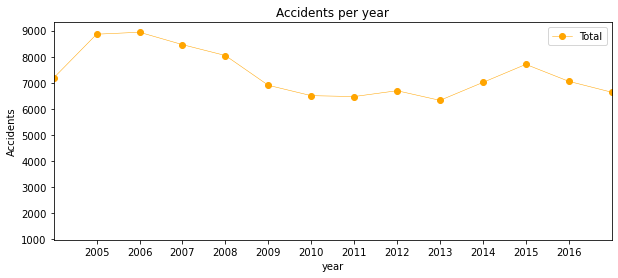

In [135]:
df1['date'] = pd.to_datetime(df1['INCDATE'], format='%Y-%m-%d')
df1['year'] = df1.date.dt.year
df1['month'] = df1.date.dt.month
df1['weekday'] = df1.date.dt.weekday

yearly = df1[['year','INCKEY']].groupby('year').count()
yearly['INCKEY'].plot.line(figsize=(10,4), marker='o', linewidth=0.5, color='orange', label='Total')
plt.title('Accidents per year')
plt.xticks(range(2005,2017))
plt.xlim(2004,2017)
plt.ylabel('Accidents')
plt.legend()

### Step7: Data Normlization

In [123]:
df3 = df1[['LIGHTCOND','ROADCOND','HITPARKEDCAR', 'WEATHER', 'PEDROWNOTGRNT', 'SPEEDING', 'PEDCOUNT', 'VEHCOUNT']] 

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df3) 
df3.loc[:,:] = scaled_values

df3

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,LIGHTCOND,ROADCOND,HITPARKEDCAR,WEATHER,PEDROWNOTGRNT,SPEEDING,PEDCOUNT,VEHCOUNT
0,0.666667,1.000000,0.0,0.454545,0.0,0.0,0.0,0.181818
1,0.666667,1.000000,0.0,0.636364,0.0,1.0,0.0,0.090909
2,0.666667,0.111111,0.0,0.454545,0.0,0.0,0.0,0.181818
3,1.000000,0.111111,0.0,0.181818,0.0,0.0,0.0,0.181818
4,0.666667,0.111111,0.0,0.636364,0.0,0.0,0.0,0.181818
...,...,...,...,...,...,...,...,...
116347,0.666667,1.000000,0.0,0.636364,0.0,0.0,0.0,0.181818
116348,0.666667,1.000000,0.0,0.636364,0.0,0.0,0.0,0.181818
116349,0.666667,0.111111,0.0,0.636364,0.0,0.0,0.0,0.181818
116350,1.000000,0.111111,0.0,0.181818,0.0,0.0,0.0,0.181818


### Step8: Splitting Data Into training and testing set

In [124]:
#columns = 'LIGHTCOND','ROADCOND','HITPARKEDCAR', 'WEATHER', 'PEDROWNOTGRNT', 'SPEEDING', 'PEDCOUNT', 'VEHCOUNT'

X_train, X_test, y_train, y_test = train_test_split(df3, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(93081, 8) (93081,)
(23271, 8) (23271,)


### Step9: Buillding the predictive model and evaluating its perfromace

In [125]:
LR = LogisticRegression()
KNN = KNeighborsClassifier()
NB = GaussianNB()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()

In [126]:
LR_fit = LR.fit(X_train, y_train)
KNN_fit = KNN.fit(X_train, y_train)
NB_fit = NB.fit(X_train, y_train)
DT_fit = DT.fit(X_train, y_train)
RF_fit = RF.fit(X_train, y_train)

In [127]:
LR_pred = LR_fit.predict(X_test)
KNN_pred = KNN_fit.predict(X_test)
NB_pred = NB_fit.predict(X_test)
DT_pred = DT_fit.predict(X_test)
RF_pred = RF_fit.predict(X_test)

In [128]:
print("the accuracy score of Logistic Regression -->", accuracy_score(LR_pred, y_test)*100)
print("the accuracy score of K nearest neighebors -->", accuracy_score(KNN_pred, y_test)*100)
print("the accuracy score of Naive Bayes -->", accuracy_score(NB_pred, y_test)*100)
print("the accuracy score of Decision Tree -->", accuracy_score(DT_pred, y_test)*100)
print("the accuracy score of Random Forest -->", accuracy_score(RF_pred, y_test)*100)

the accuracy score of Logistic Regression --> 70.76618967814018
the accuracy score of K nearest neighebors --> 62.481199776545914
the accuracy score of Naive Bayes --> 69.94112844312664
the accuracy score of Decision Tree --> 70.5255468179279
the accuracy score of Random Forest --> 70.49546646040136


### From the above results, it can bee seen that logistic regression has acieved the best results